# Import packages

In [168]:
import pandas as pd
from teradataml import *
import ast
import json
import matplotlib.pyplot as plt


from utils import clean_text
from constants import (
JIO_MART_DATASET_MAPPED, MWPD_FULL_DATASET, USDA_TO_CPG, EXTRA_FOOD_DATA, MANUALLY_LABELLED_DATASET, JIO_MART_DATASET, GPC_PATH
)


In [ ]:
def preprocess_keep_symbols(text):
    if pd.isna(text): return ""
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^a-z0-9\s\+\-/\.]', ' ', text)
    return ' '.join(text.split())

## MWPD Dataset

In [96]:
mwpd_df = pd.read_csv(MWPD_FULL_DATASET)
mwpd_df.head(5)

,Name,Description,SegmentTitle,FamilyTitle,ClassTitle
0,Sterling Silver Angel Charm,This little angel charm is just heavenly,64000000_Personal Accessories,64010000_Personal Accessories,64010100_Jewellery
1,HP Pavilion 23xi 58.40 cm (23�) IPS Monitor,"Share photos, videos, and games with everyone ...",65000000_Computing,65010000_Computers/Video Games,65010700_Computer/Video Game Peripherals
2,East Carolina Pirates Ladies Personalized Bask...,Feel like a bona fide member of East Carolina ...,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
3,"Tekonsha 90195 P3 Electric Brake Control, 1-4 ...",Receive free shipping on this item. Enter coup...,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77011200_Automotive Maintenance/Repair
4,RN-XV WiFly Module - Wire Antenna,Description: The RN-XV module by Roving Networ...,78000000_Electrical Supplies,78050000_Electronic Communication Components,78050100_Electronic Communication Components


In [94]:
mwpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          16119 non-null  object
 1   Description   16119 non-null  object
 2   SegmentTitle  16119 non-null  object
 3   FamilyTitle   16119 non-null  object
 4   ClassTitle    16119 non-null  object
dtypes: object(5)
memory usage: 629.8+ KB


In [9]:
mwpd_df = mwpd_df.applymap(preprocess_keep_symbols)

C:\Users\ss255385\AppData\Local\Temp\ipykernel_5096\767690336.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mwpd_df = mwpd_df.applymap(preprocess_keep_symbols)


In [10]:
mwpd_df.isna().sum()

Name            0
Description     0
SegmentTitle    0
FamilyTitle     0
ClassTitle      0
dtype: int64

In [11]:
for col in ["SegmentTitle", "FamilyTitle", "ClassTitle"]:
    print(f"Unique {col}: {mwpd_df[col].nunique()}")

Unique SegmentTitle: 37
Unique FamilyTitle: 76
Unique ClassTitle: 283


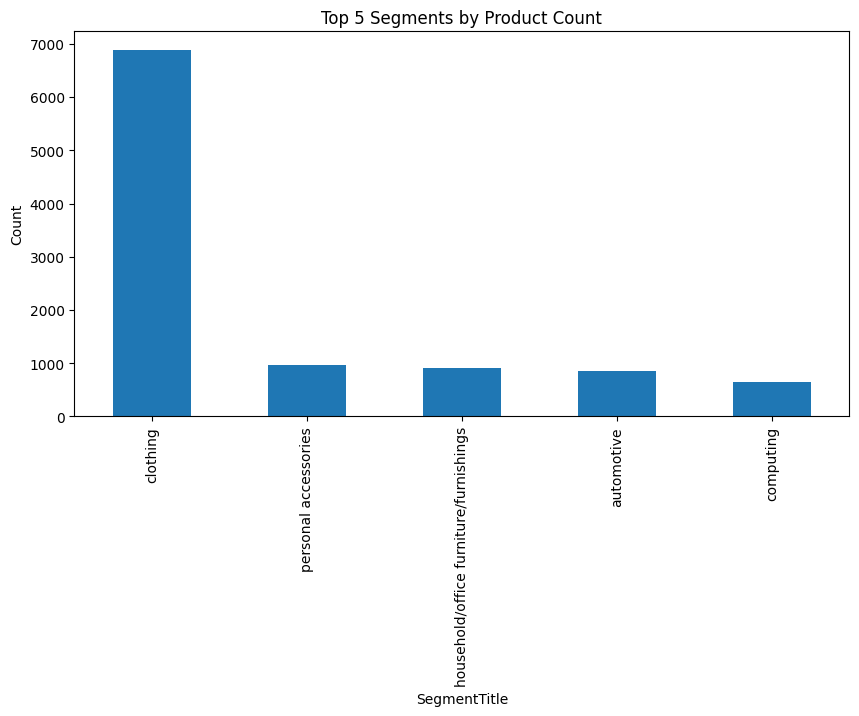

In [78]:
plt.figure(figsize=(10,5))
mwpd_df["SegmentTitle"].value_counts().head(5).plot(kind="bar")
plt.title("Top 5 Segments by Product Count")
plt.ylabel("Count")
plt.show()

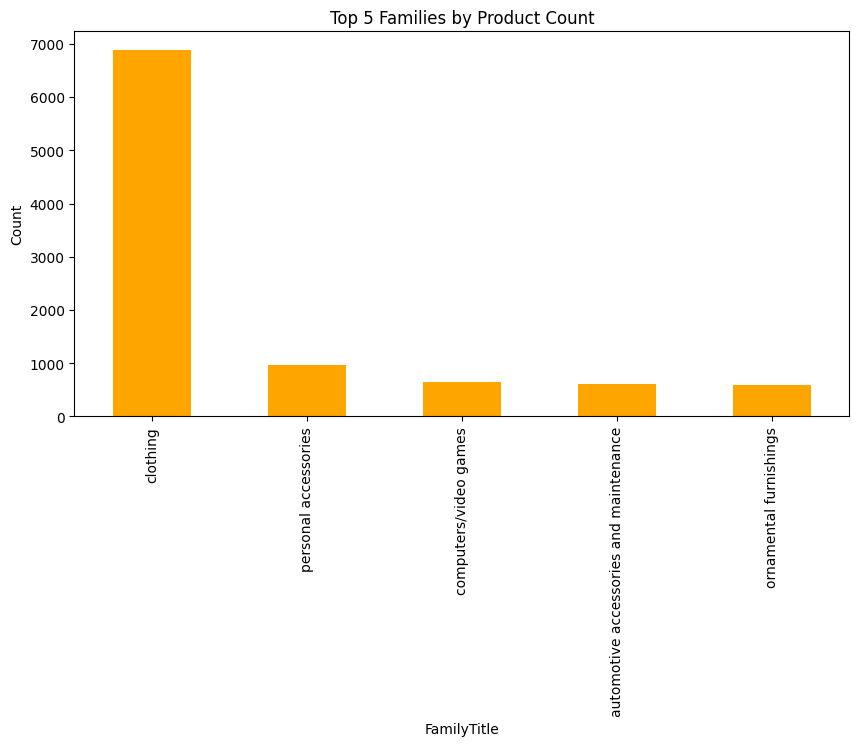

In [79]:
plt.figure(figsize=(10,5))
mwpd_df["FamilyTitle"].value_counts().head(5).plot(kind="bar", color="orange")
plt.title("Top 5 Families by Product Count")
plt.ylabel("Count")
plt.show()

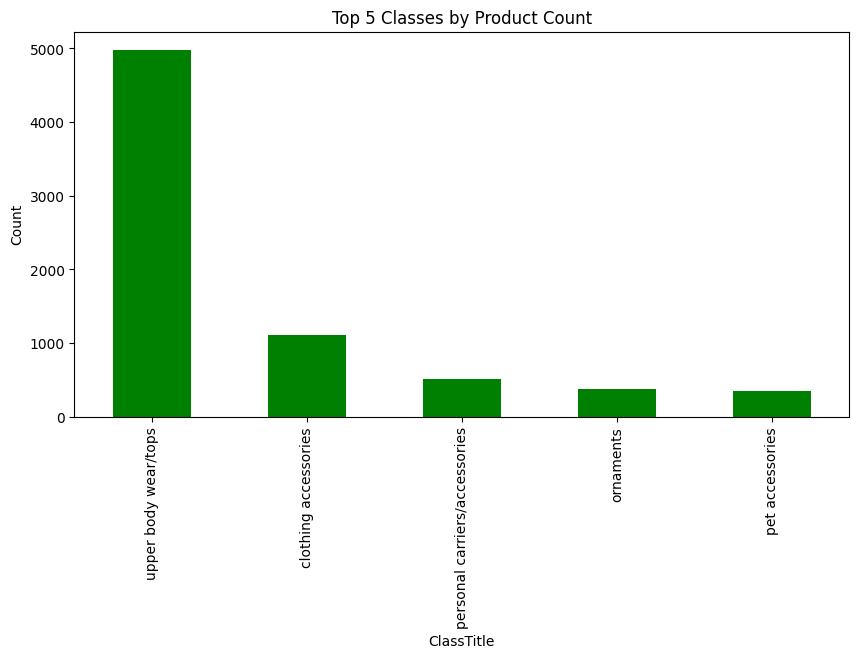

In [80]:
plt.figure(figsize=(10,5))
mwpd_df["ClassTitle"].value_counts().head(5).plot(kind="bar", color="green")
plt.title("Top 5 Classes by Product Count")
plt.ylabel("Count")
plt.show()

In [8]:
seg_fam = mwpd_df.groupby("FamilyTitle")["SegmentTitle"].nunique()
print("\nFamilies mapping to multiple Segments:", (seg_fam > 1).sum())


Families mapping to multiple Segments: 0


In [9]:
fam_cls = mwpd_df.groupby("ClassTitle")["FamilyTitle"].nunique()
print("Classes mapping to multiple Families:", (fam_cls > 1).sum())

Classes mapping to multiple Families: 1


In [19]:
print("\nProducts per Segment (top 5):")
mwpd_df.groupby("SegmentTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Segment (top 5):


SegmentTitle
clothing                                  6887
personal accessories                       962
household/office furniture/furnishings     910
automotive                                 846
computing                                  642
Name: Name, dtype: int64

In [20]:
print("\nProducts per Segment (lower 5):")
mwpd_df.groupby("SegmentTitle")["Name"].count().sort_values(ascending=False).tail(5)


Products per Segment (lower 5):


SegmentTitle
horticulture plants           26
storage/haulage containers    18
fuels/gases                    7
tool storage/workshop aids     6
lubricants                     2
Name: Name, dtype: int64

In [21]:
print("\nProducts per Family (top 5):")
mwpd_df.groupby("FamilyTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Family (top 5):


FamilyTitle
clothing                                  6887
personal accessories                       962
computers/video games                      642
automotive accessories and maintenance     617
ornamental furnishings                     595
Name: Name, dtype: int64

In [22]:
print("\nProducts per Family (lower 5):")
mwpd_df.groupby("FamilyTitle")["Name"].count().sort_values(ascending=False).tail(5)


Products per Family (lower 5):


FamilyTitle
stationery/office machinery/occasion supplies variety packs    3
waste management products                                      3
live plants genus a thru g                                     2
lubricants/protective compounds                                2
plants variety packs                                           2
Name: Name, dtype: int64

In [23]:
print("\nProducts per Class (top 5):")
mwpd_df.groupby("ClassTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Class (top 5):


ClassTitle
upper body wear/tops             4979
clothing accessories             1109
personal carriers/accessories     513
ornaments                         370
pet accessories                   350
Name: Name, dtype: int64

In [24]:
print("\nProducts per Class (lower 5):")
mwpd_df.groupby("ClassTitle")["Name"].count().sort_values(ascending=False).tail(5)


Products per Class (lower 5):


ClassTitle
role play toys                             1
beverages variety packs                    1
automotive trailers/trailer accessories    1
tools/equipment hand variety packs         1
toys/games variety packs                   1
Name: Name, dtype: int64

## Jio Mart

In [26]:
jio_mart_df = pd.read_csv(JIO_MART_DATASET)
jio_mart_df = jio_mart_df.loc[~jio_mart_df['items'].isna(), :]
jio_mart_df = jio_mart_df.drop(columns=['href', 'price'])
jio_mart_df.rename(columns={'items': 'product name'}, inplace=True)
jio_mart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162280 entries, 0 to 162312
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      162280 non-null  object
 1   sub_category  162280 non-null  object
 2   product name  162280 non-null  object
dtypes: object(3)
memory usage: 5.0+ MB


In [106]:
jio_mart_df = pd.read_csv(JIO_MART_DATASET)
jio_mart_df.head()

,category,sub_category,href,items,price
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0


In [28]:
jio_mart_df_cateogires = jio_mart_df["category"].nunique()
jio_mart_df_cateogires

6

In [29]:
jio_mart_df_sub_cateogires = jio_mart_df["sub_category"].nunique()
jio_mart_df_sub_cateogires

69

In [60]:
jio_mart_df.head()

,category,sub_category,product name
0,Groceries,Fruits & Vegetables,Fresh Dates (Pack) (Approx 450 g - 500 g)
1,Groceries,Fruits & Vegetables,Tender Coconut Cling Wrapped (1 pc) (Approx 90...
2,Groceries,Fruits & Vegetables,Mosambi 1 kg
3,Groceries,Fruits & Vegetables,Orange Imported 1 kg
4,Groceries,Fruits & Vegetables,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...


In [30]:
jio_mart_df.isna().sum()

category        0
sub_category    0
product name    0
dtype: int64

In [44]:
jio_mart_df_mapped = pd.read_csv(JIO_MART_DATASET_MAPPED)

In [45]:
jio_mart_df_mapped.head()

,category,sub_category,product name,Segment,Family,Class,Brick
0,Groceries,Fruits & Vegetables,Fresh Dates (Pack) (Approx 450 g - 500 g),Food/Beverage,Fruits/Vegetables Fresh Cut,NaN,NaN
1,Groceries,Fruits & Vegetables,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,Food/Beverage,Fruits/Vegetables Fresh Cut,NaN,NaN
2,Groceries,Fruits & Vegetables,Mosambi 1 kg,Food/Beverage,Fruits/Vegetables Fresh Cut,NaN,NaN
3,Groceries,Fruits & Vegetables,Orange Imported 1 kg,Food/Beverage,Fruits/Vegetables Fresh Cut,NaN,NaN
4,Groceries,Fruits & Vegetables,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,Food/Beverage,Fruits/Vegetables Fresh Cut,NaN,NaN


In [125]:
jio_mart_df_mapped.iloc[162103]

category                                                   Beauty
sub_category                                       Men's Grooming
product name    Urban Gabru Beard Oil - Menthol Fresh with Ora...
Segment                              Beauty/Personal Care/Hygiene
Family                                  Personal Hygiene Products
Class                                    General Personal Hygiene
Brick                                                         NaN
Name: 162103, dtype: object

In [ ]:
# jio_mart_df_mapped = jio_mart_df_mapped.applymap(preprocess_keep_symbols)

C:\Users\ss255385\AppData\Local\Temp\ipykernel_5096\3092287498.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  jio_mart_df_mapped = jio_mart_df_mapped.applymap(preprocess_keep_symbols)


In [97]:
for col in ["Segment", "Family", "Class", "Brick"]:
    print(f"Unique {col}: {jio_mart_df_mapped[col].nunique()}")

Unique Segment: 23
Unique Family: 39
Unique Class: 25
Unique Brick: 0


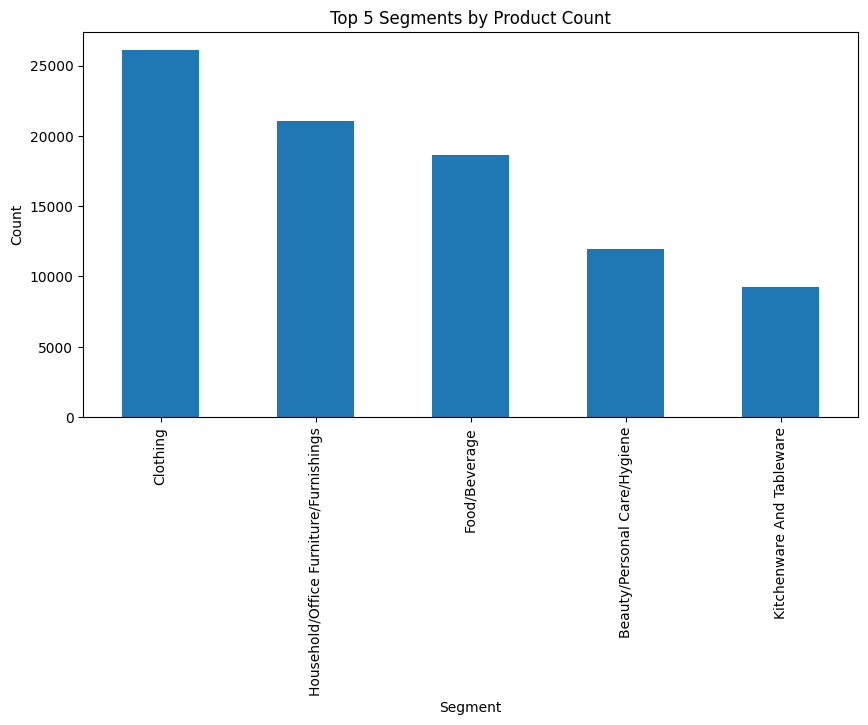

In [81]:
plt.figure(figsize=(10,5))
jio_mart_df_mapped["Segment"].value_counts().head(5).plot(kind="bar")
plt.title("Top 5 Segments by Product Count")
plt.ylabel("Count")
plt.show()

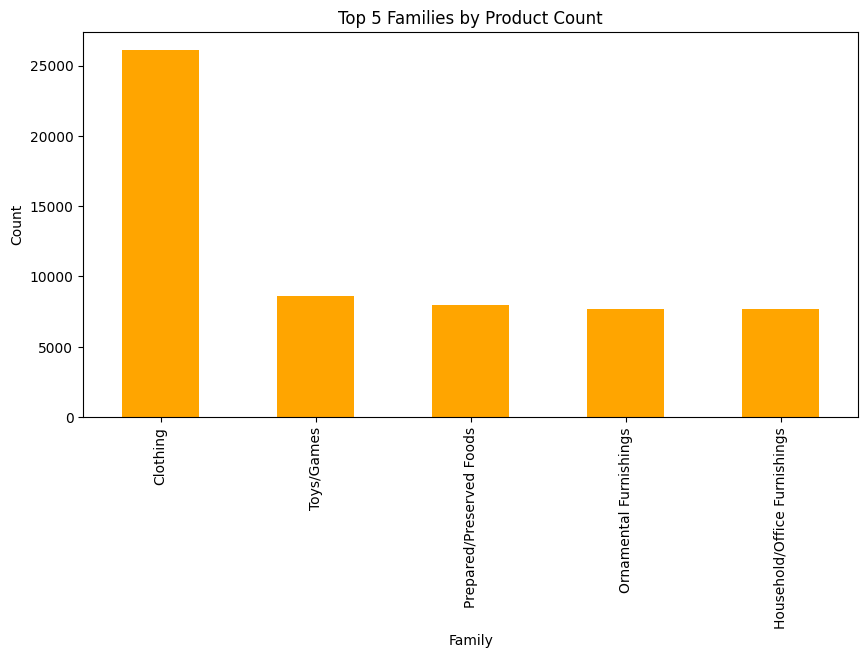

In [82]:
plt.figure(figsize=(10,5))
jio_mart_df_mapped["Family"].value_counts().head(5).plot(kind="bar", color="orange")
plt.title("Top 5 Families by Product Count")
plt.ylabel("Count")
plt.show()

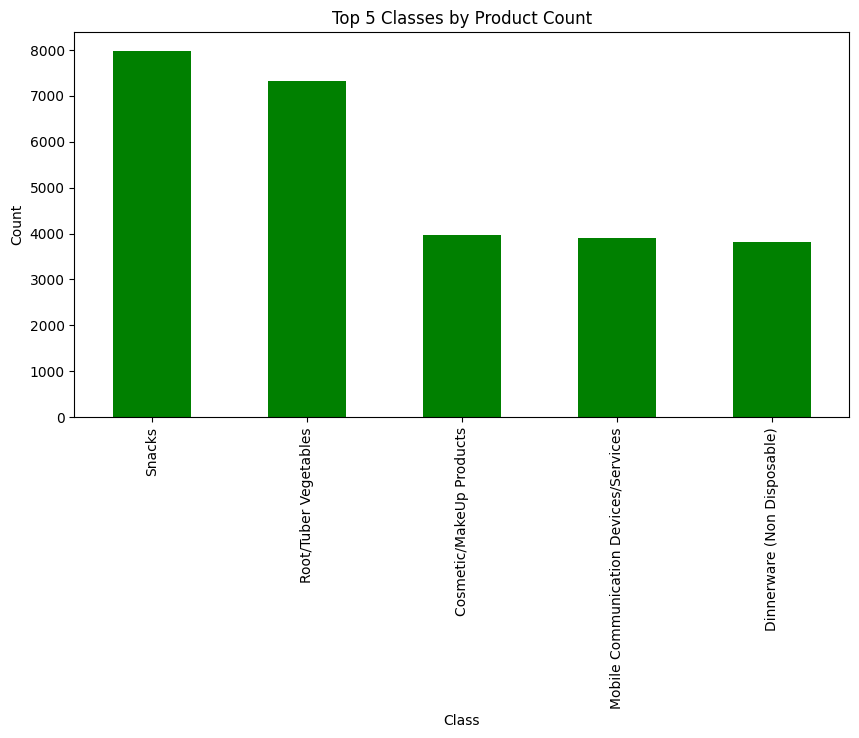

In [89]:
plt.figure(figsize=(10,5))
jio_mart_df_mapped["Class"].value_counts().head(5).plot(kind="bar", color="green")
plt.title("Top 5 Classes by Product Count")
plt.ylabel("Count")
plt.show()

In [54]:
print("\nProducts per Segment (top 5):")
jio_mart_df_mapped.groupby("Segment")["product name"].count().sort_values(ascending=False).head(5)


Products per Segment (top 5):


Segment
Clothing                                  26087
Household/Office Furniture/Furnishings    21030
Food/Beverage                             18631
Beauty/Personal Care/Hygiene              11918
Kitchenware And Tableware                  9263
Name: product name, dtype: int64

In [53]:
print("\nProducts per Segment (lower 5):")
jio_mart_df_mapped.groupby("Segment")["product name"].count().sort_values(ascending=False).tail(5)


Products per Segment (lower 5):


Segment
Plumbing/Heating/Ventilation/Air Conditioning    231
Safety/Security/Surveillance                      61
Building Products                                 32
Healthcare                                        22
Sports Equipment                                   3
Name: product name, dtype: int64

In [56]:
print("\nProducts per Family (top 5):")
jio_mart_df_mapped.groupby("Family")["product name"].count().sort_values(ascending=False).head(5)


Products per Family (top 5):


Family
Clothing                        26087
Toys/Games                       8594
Prepared/Preserved Foods         7986
Ornamental Furnishings           7685
Household/Office Furnishings     7682
Name: product name, dtype: int64

In [57]:
print("\nProducts per Family (lower 5):")
jio_mart_df_mapped.groupby("Family")["product name"].count().sort_values(ascending=False).tail(5)


Products per Family (lower 5):


Family
Building Products                                32
Plumbing/Heating/Ventilation/Air Conditioning    30
Beauty/Personal Care/Hygiene Variety Packs       23
Medical Devices                                  22
Sports Equipment                                  3
Name: product name, dtype: int64

In [58]:
print("\nProducts per Class (top 5):")
jio_mart_df_mapped.groupby("Class")["product name"].count().sort_values(ascending=False).head(5)


Products per Class (top 5):


Class
Snacks                                   7986
Root/Tuber Vegetables                    7318
Cosmetic/MakeUp Products                 3962
Mobile Communication Devices/Services    3895
Dinnerware (Non Disposable)              3816
Name: product name, dtype: int64

In [59]:
print("\nProducts per Class (lower 5):")
jio_mart_df_mapped.groupby("Class")["product name"].count().sort_values(ascending=False).tail(5)


Products per Class (lower 5):


Class
General Personal Hygiene                         68
Painting                                         31
Plumbing/Heating/Ventilation/Air Conditioning    30
Medical Devices                                  22
Ornaments                                        15
Name: product name, dtype: int64

## Food Product Image Dataset

In [111]:
extra_food_df = pd.read_csv(EXTRA_FOOD_DATA)
extra_food_df.tail()

,Name,SegmentTitle,FamilyTitle,ClassTitle,BrickTitle
245,Bio Garten Kresse,Food/Beverage,Leaf Vegetables - Unprepared/Unprocessed (Fresh),Single Leaf Salad Greens,Watercress
246,Pflücksalat,Food/Beverage,Leaf Vegetables - Unprepared/Unprocessed (Fresh),Loose Leaf/Multileaf Salad Greens,Loose Leaf/Multileaf Lettuce Other
247,Cornetto,Food/Beverage,Prepared/Preserved Foods,Desserts/Desserts Substitutes/Dessert Sauces/T...,Ice Cream/Ice Novelties (Frozen)
248,Magnum Mini,Food/Beverage,Prepared/Preserved Foods,Desserts/Desserts Substitutes/Dessert Sauces/T...,Ice Cream/Ice Novelties (Frozen)
249,Himbeeren,Food/Beverage,Fruits - Unprepared/Unprocessed (Frozen),Fruits - Unprepared/Unprocessed (Frozen),Fruit - Unprepared/Unprocessed (Frozen)


In [113]:
extra_food_df.iloc[50]

Name                             Dallmanns Ingwer-Salbei Bonbons"
SegmentTitle                                        Food/Beverage
FamilyTitle               Confectionery/Sugar Sweetening Products
ClassTitle                                 Confectionery Products
BrickTitle      Sugar Candy/Sugar Candy Substitutes Confectionery
Name: 50, dtype: object

In [107]:
extra_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          250 non-null    object
 1   SegmentTitle  250 non-null    object
 2   FamilyTitle   250 non-null    object
 3   ClassTitle    250 non-null    object
 4   BrickTitle    250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
extra_food_df.isna().sum()

In [110]:
for col in ["SegmentTitle", "FamilyTitle", "ClassTitle", "BrickTitle"]:
    print(f"Unique {col}: {extra_food_df[col].nunique()}")

Unique SegmentTitle: 1
Unique FamilyTitle: 19
Unique ClassTitle: 62
Unique BrickTitle: 100


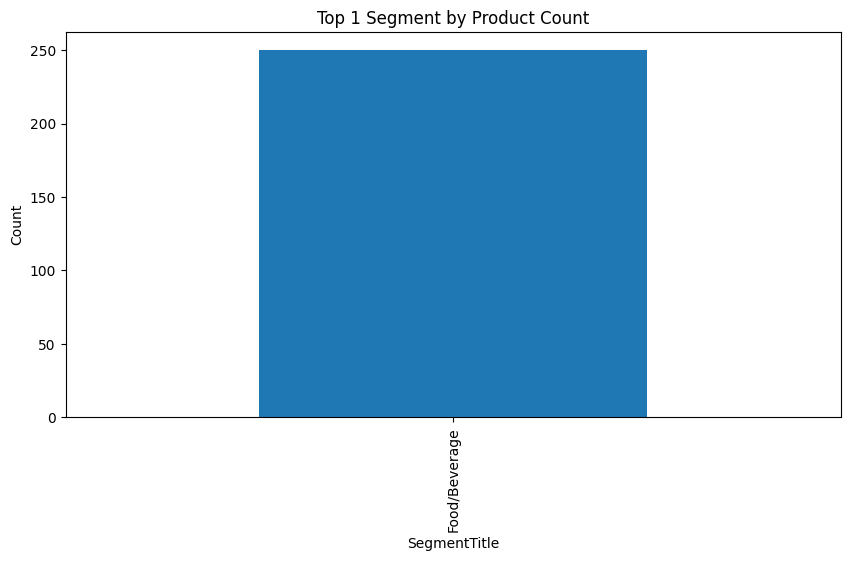

In [74]:
plt.figure(figsize=(10,5))
extra_food_df["SegmentTitle"].value_counts().head(10).plot(kind="bar")
plt.title("Top 1 Segment by Product Count")
plt.ylabel("Count")
plt.show()

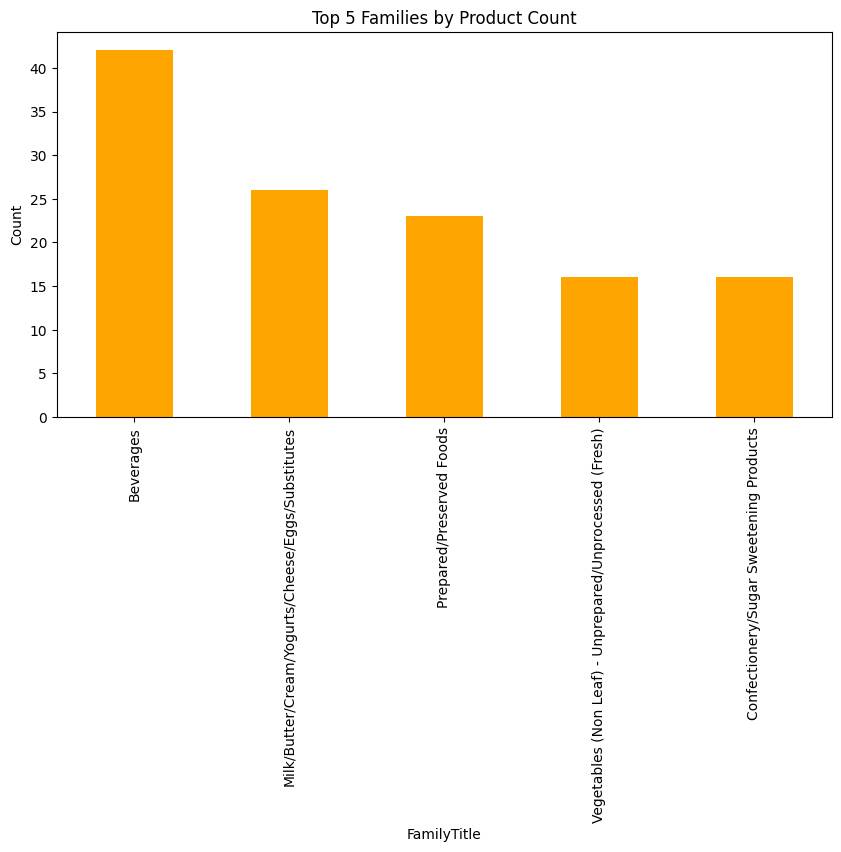

In [85]:
plt.figure(figsize=(10,5))
extra_food_df["FamilyTitle"].value_counts().head(5).plot(kind="bar", color="orange")
plt.title("Top 5 Families by Product Count")
plt.ylabel("Count")
plt.show()

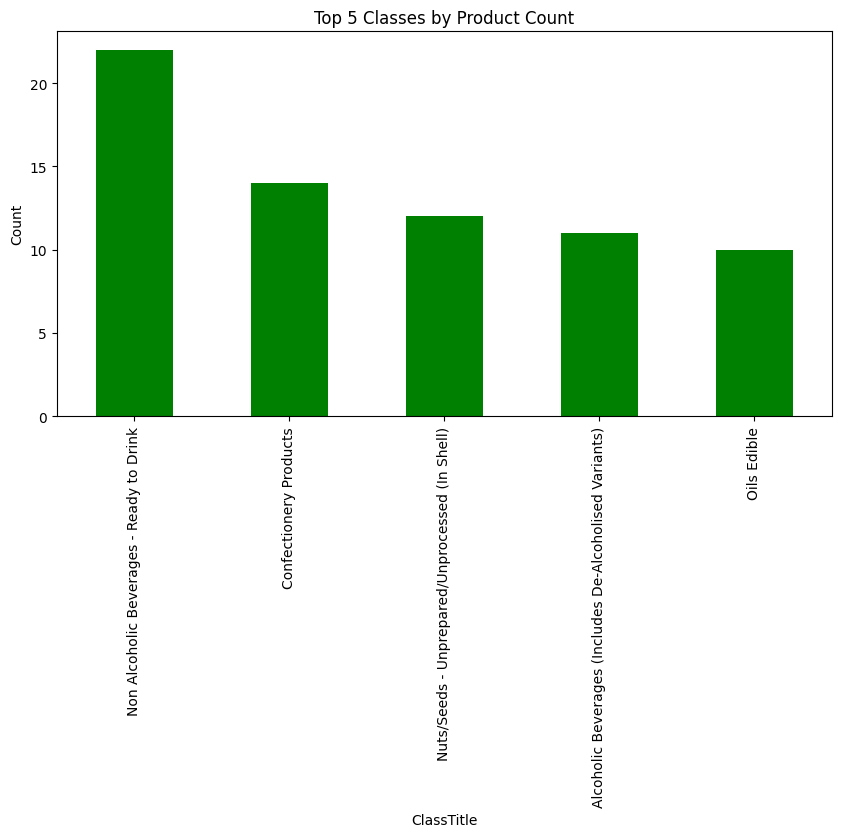

In [86]:
plt.figure(figsize=(10,5))
extra_food_df["ClassTitle"].value_counts().head(5).plot(kind="bar", color="green")
plt.title("Top 5 Classes by Product Count")
plt.ylabel("Count")
plt.show()

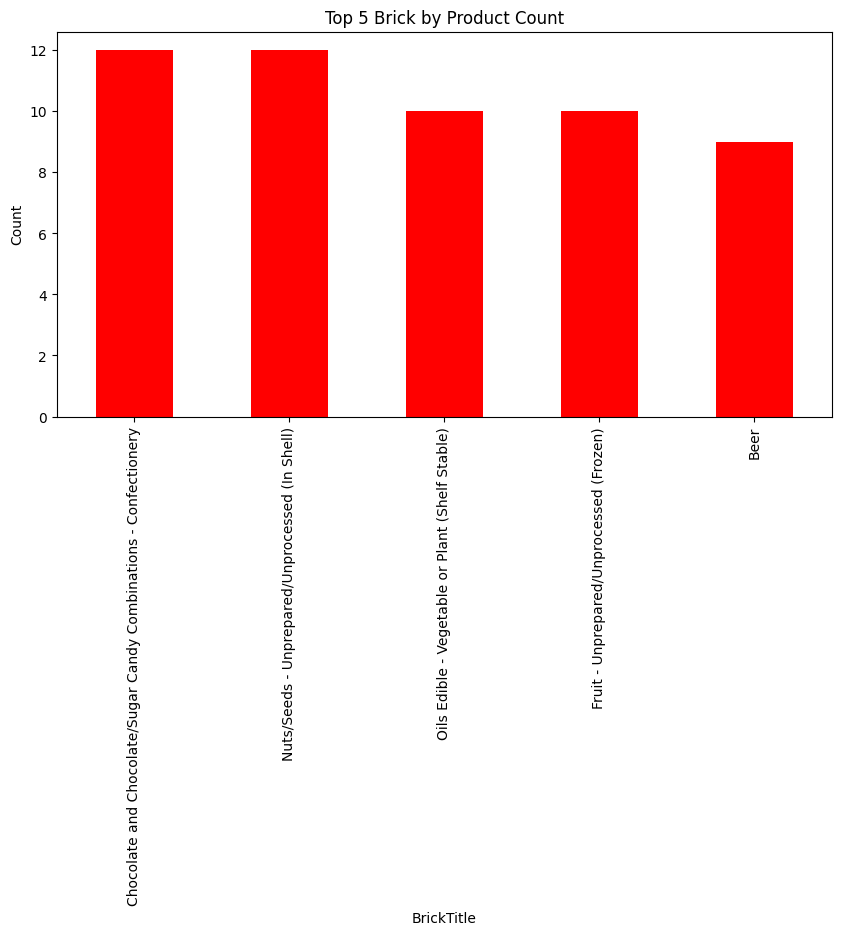

In [90]:
plt.figure(figsize=(10,5))
extra_food_df["BrickTitle"].value_counts().head(5).plot(kind="bar", color="red")
plt.title("Top 5 Brick by Product Count")
plt.ylabel("Count")
plt.show()

In [68]:
print("\nProducts per Segment (top 5):")
extra_food_df.groupby("SegmentTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Segment (top 5):


SegmentTitle
Food/Beverage    250
Name: Name, dtype: int64

In [69]:
print("\nProducts per Segment (lower 5):")
extra_food_df.groupby("SegmentTitle")["Name"].count().sort_values(ascending=False).tail(5)


Products per Segment (lower 5):


SegmentTitle
Food/Beverage    250
Name: Name, dtype: int64

In [70]:
print("\nProducts per Family (top 5):")
extra_food_df.groupby("FamilyTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Family (top 5):


FamilyTitle
Beverages                                                 42
Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes         26
Prepared/Preserved Foods                                  23
Confectionery/Sugar Sweetening Products                   16
Vegetables (Non Leaf) - Unprepared/Unprocessed (Fresh)    16
Name: Name, dtype: int64

In [71]:
print("\nProducts per Family (lower 5):")
extra_food_df.groupby("FamilyTitle")["Name"].count().sort_values(ascending=False).tail(5)


Products per Family (lower 5):


FamilyTitle
Leaf Vegetables - Unprepared/Unprocessed (Fresh)      9
Meat/Poultry/Other Animals                            8
Fruits/Vegetables/Nuts/Seeds Prepared/Processed       7
Fruits - Unprepared/Unprocessed (Shelf Stable)        2
Vegetables - Unprepared/Unprocessed (Shelf Stable)    1
Name: Name, dtype: int64

In [72]:
print("\nProducts per Class (top 5):")
extra_food_df.groupby("ClassTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Class (top 5):


ClassTitle
Non Alcoholic Beverages - Ready to Drink                  22
Confectionery Products                                    14
Nuts/Seeds - Unprepared/Unprocessed (In Shell)            12
Alcoholic Beverages (Includes De-Alcoholised Variants)    11
Fruits - Unprepared/Unprocessed (Frozen)                  10
Name: Name, dtype: int64

In [73]:
print("\nProducts per Bricks (top 5):")
extra_food_df.groupby("ClassTitle")["Name"].count().sort_values(ascending=False).head(5)


Products per Bricks (top 5):


ClassTitle
Non Alcoholic Beverages - Ready to Drink                  22
Confectionery Products                                    14
Nuts/Seeds - Unprepared/Unprocessed (In Shell)            12
Alcoholic Beverages (Includes De-Alcoholised Variants)    11
Fruits - Unprepared/Unprocessed (Frozen)                  10
Name: Name, dtype: int64

## Full Dataset

In [164]:
full_df = pd.read_csv('../all_data_0.85.csv')
full_df.head()

C:\Users\ss255385\AppData\Local\Temp\ipykernel_5096\4278126411.py:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('../all_data_0.85.csv')


,Unnamed: 0,product_name,description,segment,family,class,brick,source,text,dedup_key
0,0,Sterling Silver Angel Charm,This little angel charm is just heavenly,personal accessories,personal accessories,jewellery,NaN,MWPD_FULL,sterling silver angel charm,sterling silver angel charm
1,1,HP Pavilion 23xi 58.40 cm (23�) IPS Monitor,"Share photos, videos, and games with everyone ...",computing,computers video games,computer video game peripherals,NaN,MWPD_FULL,hp pavilion 23xi 58.40 cm 23 ips monitor,hp pavilion 23xi 58 40 cm 23 ips monitor
2,2,East Carolina Pirates Ladies Personalized Bask...,Feel like a bona fide member of East Carolina ...,clothing,clothing,upper body wear tops,NaN,MWPD_FULL,east carolina pirates ladies personalized bask...,east carolina pirates ladies personalized bask...
3,3,"Tekonsha 90195 P3 Electric Brake Control, 1-4 ...",Receive free shipping on this item. Enter coup...,automotive,automotive accessories and maintenance,automotive maintenance repair,NaN,MWPD_FULL,tekonsha 90195 p3 electric brake control 1-4 t...,tekonsha 90195 p3 electric brake control 1 4 t...
4,4,RN-XV WiFly Module - Wire Antenna,Description: The RN-XV module by Roving Networ...,electrical supplies,electronic communication components,electronic communication components,NaN,MWPD_FULL,rn-xv wifly module - wire antenna,rn xv wifly module wire antenna


In [163]:
df = full_df[(full_df['family'].notna()) & (full_df['class'].isna())]
df.iloc[4883]

Unnamed: 0                                                  68473
product_name    NAALSA - Venus Stainless Steel High Carbon Bre...
description                                                   NaN
segment                                 kitchenware and tableware
family                                                kitchenware
class                                                         NaN
brick                                                         NaN
source                                                   JIO_MART
text            naalsa - venus stainless steel high carbon bre...
dedup_key       naalsa venus stainless steel high carbon bread...
Name: 64028, dtype: object

In [165]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158229 entries, 0 to 158228
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    158229 non-null  int64 
 1   product_name  158229 non-null  object
 2   description   15215 non-null   object
 3   segment       128807 non-null  object
 4   family        128807 non-null  object
 5   class         61908 non-null   object
 6   brick         3725 non-null    object
 7   source        158229 non-null  object
 8   text          158229 non-null  object
 9   dedup_key     158225 non-null  object
dtypes: int64(1), object(9)
memory usage: 12.1+ MB


In [128]:
full_df.isna().sum()

Unnamed: 0           0
product_name         0
description     143014
segment          29422
family           29422
class            96321
brick           154504
source               0
text                 0
dedup_key            4
dtype: int64

In [130]:
for col in ["segment", "family", "class", "brick"]:
    print(f"Unique {col}: {full_df[col].nunique()}")

Unique segment: 42
Unique family: 98
Unique class: 349
Unique brick: 119


In [132]:
print("\nProducts per Segment (top 5):")
full_df.groupby("segment")["product_name"].count().sort_values(ascending=False).head(5)


Products per Segment (top 5):


segment
clothing                                  22013
food beverage                             22005
household office furniture furnishings    18712
beauty personal care hygiene              11895
kitchenware and tableware                  9042
Name: product_name, dtype: int64

In [133]:
print("\nProducts per Segment (lower 5):")
full_df.groupby("segment")["product_name"].count().sort_values(ascending=False).tail(5)


Products per Segment (lower 5):


segment
horticulture plants           25
storage haulage containers    18
fuels gases                    7
tool storage workshop aids     6
lubricants                     2
Name: product_name, dtype: int64

In [134]:
print("\nProducts per Family (top 5):")
full_df.groupby("family")["product_name"].count().sort_values(ascending=False).head(5)


Products per Family (top 5):


family
clothing                                            22013
prepared preserved foods                             8008
toys games                                           7764
vegetables non leaf unprepared unprocessed fresh     7200
ornamental furnishings                               7136
Name: product_name, dtype: int64

In [135]:
print("\nProducts per Family (lower 5):")
full_df.groupby("family")["product_name"].count().sort_values(ascending=False).tail(5)


Products per Family (lower 5):


family
fruits unprepared unprocessed shelf stable        2
lubricants protective compounds                   2
live plants genus a thru g                        2
plants variety packs                              2
vegetables unprepared unprocessed shelf stable    1
Name: product_name, dtype: int64

In [136]:
print("\nProducts per Class (top 5):")
full_df.groupby("class")["product_name"].count().sort_values(ascending=False).head(5)


Products per Class (top 5):


class
snacks                       7844
root tuber vegetables        7181
upper body wear tops         4889
cosmetic makeup products     3949
dinnerware non disposable    3706
Name: product_name, dtype: int64

In [137]:
print("\nProducts per Class (lower 5):")
full_df.groupby("class")["product_name"].count().sort_values(ascending=False).tail(5)


Products per Class (lower 5):


class
brassica vegetables                        1
automotive trailers trailer accessories    1
tools equipment hand variety packs         1
tomatoes                                   1
toys games variety packs                   1
Name: product_name, dtype: int64

In [138]:
print("\nProducts per Brick (top 5):")
full_df.groupby("brick")["product_name"].count().sort_values(ascending=False).head(5)


Products per Brick (top 5):


brick
bread perishable                           382
fruit vegetable juice ready to drink       365
cakes pastries perishable                  315
confectionery non chocolate                303
seasonings marinades prepared processed    258
Name: product_name, dtype: int64

In [139]:
print("\nProducts per Brick (lower 5):")
full_df.groupby("brick")["product_name"].count().sort_values(ascending=False).tail(5)


Products per Brick (lower 5):


brick
stock bones shelf stable                          1
vinegars                                          1
vegetables unprepared unprocessed shelf stable    1
watercress                                        1
wine still                                        1
Name: product_name, dtype: int64

## GPC

In [172]:
df = pd.read_excel(GPC_PATH)
df.head()

,SegmentCode,SegmentTitle,SegmentDefinition,FamilyCode,FamilyTitle,FamilyDefinition,ClassCode,ClassTitle,ClassDefinition,BrickCode,BrickTitle,BrickDefinition_Includes,BrickDefinition_Excludes,AttributeCode,AttributeTitle,AttributeDefinition,AttributeValueCode,AttributeValueTitle,AttributeValueDefinition
0,70000000,Arts/Crafts/Needlework,All products that are used to any creative act...,70010000,Arts/Crafts/Needlework Supplies,All products that are used to any creative act...,70010100,Artists Painting/Drawing Supplies,Includes any products that may be described/ob...,10001674,Artists Brushes/Applicators,Includes any products that can be described/ob...,Specifically excludes Household Paint Brushes ...,20001337.0,Type of Artists Brush/Applicator,"Indicates, with reference to the product brand...",30008491.0,ARTISTS BLENDER/FINISHING BRUSH,NaN
1,70000000,Arts/Crafts/Needlework,All products that are used to any creative act...,70010000,Arts/Crafts/Needlework Supplies,All products that are used to any creative act...,70010100,Artists Painting/Drawing Supplies,Includes any products that may be described/ob...,10001674,Artists Brushes/Applicators,Includes any products that can be described/ob...,Specifically excludes Household Paint Brushes ...,20001337.0,Type of Artists Brush/Applicator,"Indicates, with reference to the product brand...",30008492.0,ARTISTS CALLIGRAPHY BRUSH,NaN
2,70000000,Arts/Crafts/Needlework,All products that are used to any creative act...,70010000,Arts/Crafts/Needlework Supplies,All products that are used to any creative act...,70010100,Artists Painting/Drawing Supplies,Includes any products that may be described/ob...,10001674,Artists Brushes/Applicators,Includes any products that can be described/ob...,Specifically excludes Household Paint Brushes ...,20001337.0,Type of Artists Brush/Applicator,"Indicates, with reference to the product brand...",30008493.0,ARTISTS FLAT BRUSH,NaN
3,70000000,Arts/Crafts/Needlework,All products that are used to any creative act...,70010000,Arts/Crafts/Needlework Supplies,All products that are used to any creative act...,70010100,Artists Painting/Drawing Supplies,Includes any products that may be described/ob...,10001674,Artists Brushes/Applicators,Includes any products that can be described/ob...,Specifically excludes Household Paint Brushes ...,20001337.0,Type of Artists Brush/Applicator,"Indicates, with reference to the product brand...",30008494.0,ARTISTS ROUND BRUSH,NaN
4,70000000,Arts/Crafts/Needlework,All products that are used to any creative act...,70010000,Arts/Crafts/Needlework Supplies,All products that are used to any creative act...,70010100,Artists Painting/Drawing Supplies,Includes any products that may be described/ob...,10001674,Artists Brushes/Applicators,Includes any products that can be described/ob...,Specifically excludes Household Paint Brushes ...,20001337.0,Type of Artists Brush/Applicator,"Indicates, with reference to the product brand...",30008495.0,ARTISTS SCRIPT LINER BRUSH,NaN


In [174]:
for col in ["SegmentTitle", "FamilyTitle", "ClassTitle", "BrickTitle"]:
    print(f"Unique {col}: {df[col].nunique()}")

Unique SegmentTitle: 45
Unique FamilyTitle: 162
Unique ClassTitle: 935
Unique BrickTitle: 5300
